In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Q1

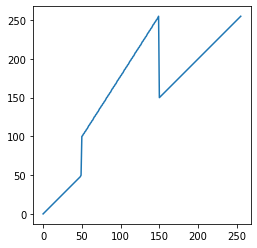

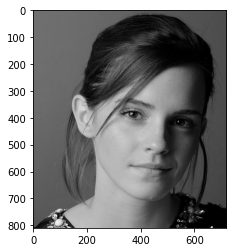

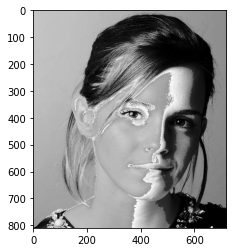

In [27]:
f = cv.imread(r'emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert f is not None

gamma = 0.2

t1 = np.linspace(0,50,50)

t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)


t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)


fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

g = cv.LUT(f,t)

newf = cv.cvtColor(f,cv.COLOR_BGR2RGB)
newg = cv.cvtColor(g,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newf)
# fig2,ax2 = plt.subplots()
# ax2.plot(t)
fig3,ax3 = plt.subplots()
ax3.imshow(newg)

Q2

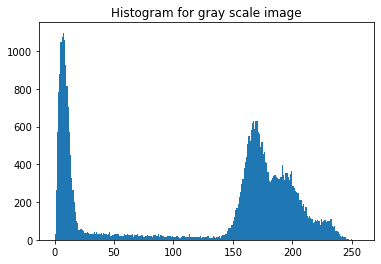

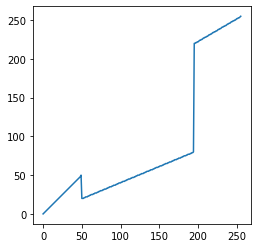

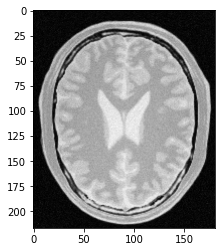

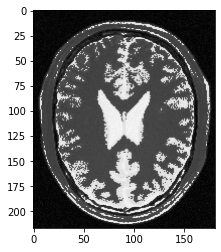

In [69]:
f = cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)

assert f is not None
hist = cv.calcHist(f,[0],None, [256], (0,256), accumulate=False)
plt.hist(f.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()
gamma = 0.2
lowerb = 50
upperb = 195
t1 = np.linspace(0,50,lowerb)
t2 = np.linspace(20,80,upperb-lowerb)
t3 = np.linspace(220,255,256-upperb)



t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

g = cv.LUT(f,t)

newf = cv.cvtColor(f,cv.COLOR_BGR2RGB)
newg = cv.cvtColor(g,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newf)
fig3,ax3 = plt.subplots()
ax3.imshow(newg)

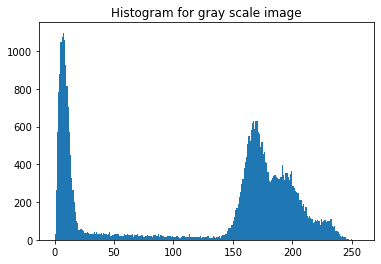

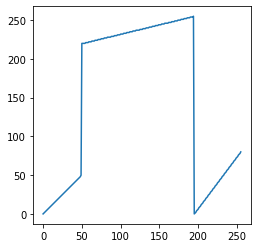

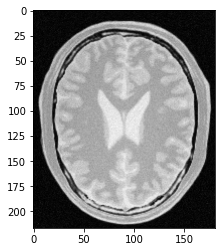

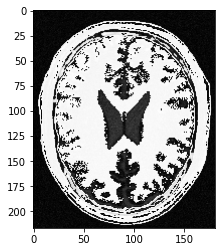

In [71]:
f = cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)

assert f is not None
hist = cv.calcHist(f,[0],None, [256], (0,256), accumulate=False)
plt.hist(f.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()
gamma = 0.2
lowerb = 50
upperb = 195
t1 = np.linspace(0,50,lowerb)
t2 = np.linspace(220,255,upperb-lowerb)
t3 = np.linspace(0,80,256-upperb)



t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

g = cv.LUT(f,t)

newf = cv.cvtColor(f,cv.COLOR_BGR2RGB)
newg = cv.cvtColor(g,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newf)
fig3,ax3 = plt.subplots()
ax3.imshow(newg)

Q3